# Multi-Class Logistic Regression

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Reading a csv dataset file into jupyter notebook using pandas library

The "Fishes.csv" file has the details of fishes from where we are going to predict the species

In [2]:
dataset = pd.read_csv("Fishes.csv") #reading csv file

dataset.head(10) #printing the first 10 rows of the dataset

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream
5,450.0,26.8,29.7,34.7,13.6024,4.9274,Bream
6,500.0,26.8,29.7,34.5,14.1795,5.2785,Bream
7,390.0,27.6,30.0,35.0,12.6700,4.6900,Bream
8,450.0,27.6,30.0,35.1,14.0049,4.8438,Bream
9,500.0,28.5,30.7,36.2,14.2266,4.9594,Bream


### Dividing the dataset to explanatory (X) and response variables (Y)

The explanatory variables (X) are those which explains the change in the result. They are also called the dependent variables as our prediction are dependent on the explanatory varirables. <br> 
The response variables (Y) are the result of the model (the prediction). These are dependent on the explanatory varibales. The changes in the X cause the resultant Y to change as well. <br>
And, in Multi Class Logistic Regression, there are going to be multiple columns in the explanatory variables which are going to be used to predict one column with 2 or more classes (i.e 2 or more possibilities of result) which is a classified data. 

In [3]:
X = dataset.iloc[ : , :6] #setting the columns 1-7 as the explanatory variables (X)
Y = dataset.iloc[ : , 6] #setting the last column as the response variable (Y)

Printing the explanatory variables

In [4]:
X

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
95,12.2,11.5,12.2,13.4,2.0904,1.3936
96,13.4,11.7,12.4,13.5,2.4300,1.2690
97,12.2,12.1,13.0,13.8,2.2770,1.2558
98,19.7,13.2,14.3,15.2,2.8728,2.0672


Printing the reponse variables

In [5]:
Y

0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
      ...  
95    Smelt
96    Smelt
97    Smelt
98    Smelt
99    Smelt
Name: Species, Length: 100, dtype: object

### Data Normalization

The normalization technique is used to bring the numeric values in the datase to a common scale. <br>
This does not change the difference in the range of values and bring all the data in a same scale without any data loss.<br>
After normalization, all the values are set between 0 and 1. <br><br>
The formula for Normalization is: 
##### X = (X - Xmin) / (Xmax - X min) <br>

In [6]:
for i in range(1, len(X.columns)): #for loop to iterate through all the columns in the dataset
    X.iloc[:, i] = (X.iloc[:, i]-np.min(X.iloc[:, i]))/(np.max(X.iloc[:, i])-np.min(X.iloc[:, i])) 
    #applying the normalization formula
    
X.head() #printing the dataset after Normalization

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,0.304854,0.309091,0.358108,0.568334,0.418978
1,290.0,0.320388,0.325455,0.378378,0.624055,0.459235
2,340.0,0.318447,0.329091,0.376689,0.618123,0.514279
3,363.0,0.365049,0.374545,0.417230,0.638566,0.480365
4,430.0,0.368932,0.374545,0.425676,0.621966,0.576004


### MULTI CLASS LOGISTIC REGRESSION

###### ----- Multi Class Logistic Regression is a technique to predict output which can have more than two classfied data. <br>

The equation of logistic regression is almost same as the linear regression but, since the linear regression gives a straight line does not really benefit the logistic regression concept, a Sigmoid function is used where we get a curved S-shaped line between 0 and 1 from where we can easily predict the outcome (either 0 or 1).

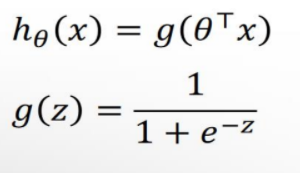

Here, theta is the bias term and x is the explanatory variable. The theta is transposed so as to get the product of the vectors. <br>
Then, the <b>sigmoid function</b> is applied. [Here, represented by g(z)]<br><br>
The <b> LOGISTIC FUNCTION EQUATION </b>:

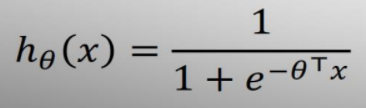

The Logistic Regression equation works on the principle of <b>Decision Boundary</b>. The final equation from the function is plotted in the graph and any points above the line or in the line is considered as the first type and others are considered as another type. <br>
The graphs are not always a straight line. The lines can make a circular shape or even an irregular shape as the decision boundary.<br>

The below graphs are some of the examples of decision boundary.

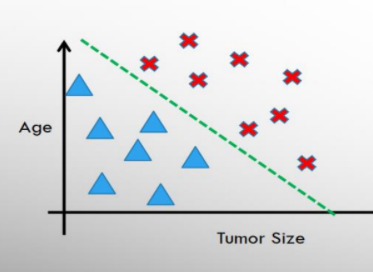

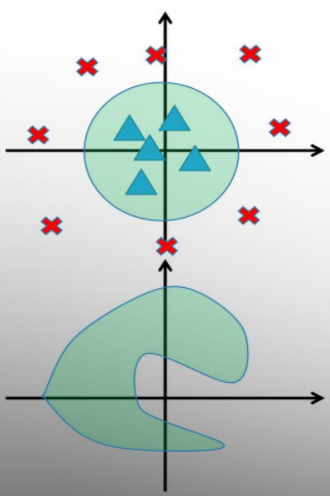

Now, while computing the cost funtion in logistic regression, if the same equation of linear regression is applied, then the optimum result cannot be attained as the curve of logistic regression is comparatively complex and we get stuck in the local minima instead of global minima.

Therefore, the following <b>COST FUNCTION</b> is applied which give the below graphs where we can see that the function is given a huge penalty of nearly equal to infinity, if the model predicts the wrong result. 

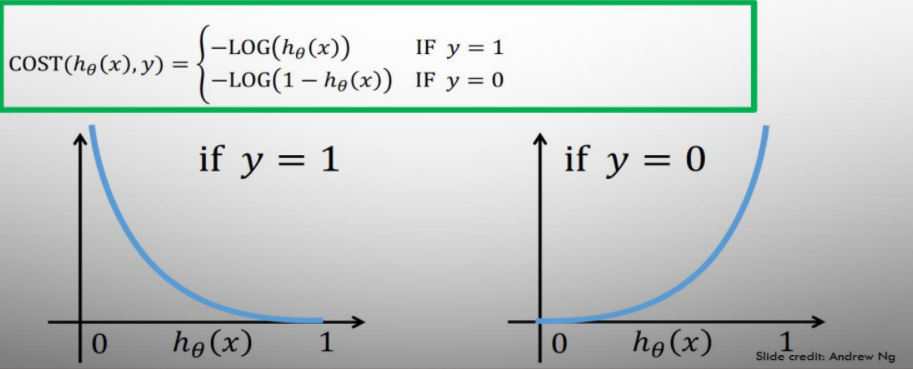

Finally, the following <b> GRADIENT DESCENT ALGORITHM</b> is applied to update the values of theta (bias term) to minimize the cost function and make the model predict better results.

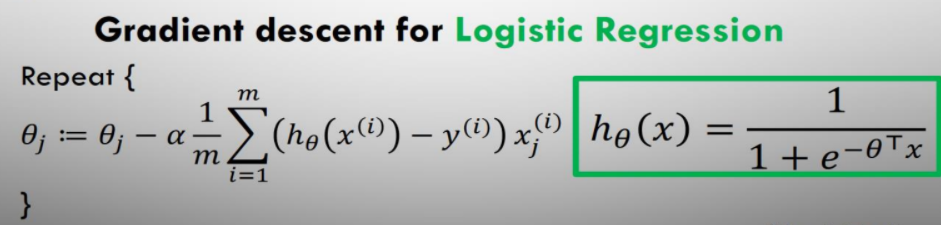

##### Splitting the dataset into train and test data

In [7]:
#putting 70% of the dataset into train data and the other 30% into test data with random state 41
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=41)

#### The LOGICTIC REGRESSION FUNCTION 

The LogisticRegression function is called from the sklearn library to apply the logistic regression function along with the optimization process.

In [8]:
classifier = LogisticRegression(C=5.0,max_iter=10000,multi_class="multinomial",solver='newton-cg', penalty='l2')

Among the many other parameters in the Logistic Regression function, only the above mentioned parameters are changed.<br>
The other parameters are mentioned below:<br>

<b>LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)</b>

The max_iteration is set to 10000 for the iteration counts. <br>
The multi_class is set as "multinomial" as we are doing a MULTI-CLASS LOGISTIC REGRESSION.<br>
The penalty is set as "l2" for regularization. It adds a tuning parameter after the cost function as shown below.

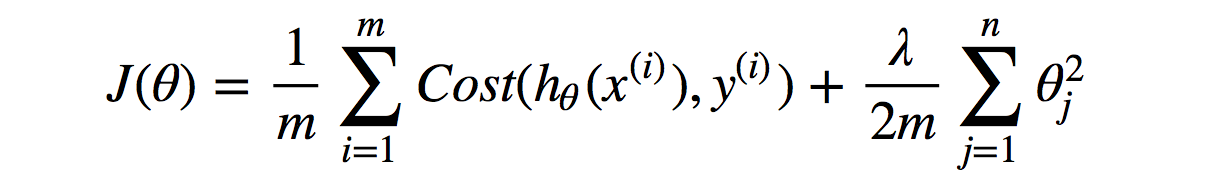

The solver is set as "newton-cg" because because the run time for sag has comparatively better run time scale.
<br>Other solvers are: lbfgs, liblinear, newton-cg, sag, saga.

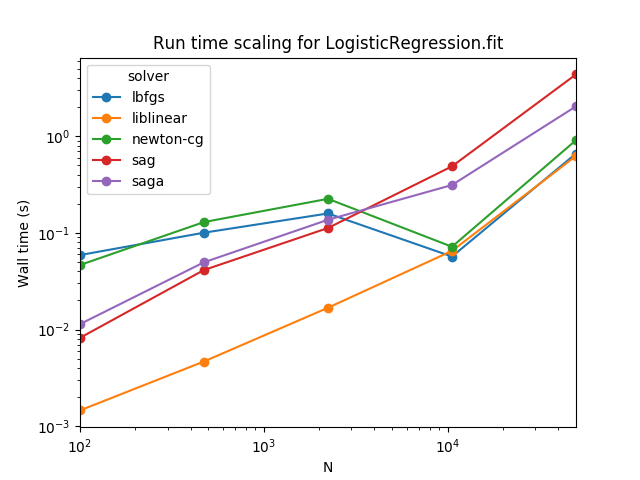

Detailed documentation in: https://neurtu.readthedocs.io/examples/logistic_regression_scaling.html

#### Making a Regression Model from the training dataset

In [9]:
classifier.fit(X_train, Y_train) 

LogisticRegression(C=5.0, max_iter=10000, multi_class='multinomial',
                   solver='newton-cg')

##### Predicting the Y values for the X test data

In [10]:
Y_pred = classifier.predict(X_test) 

#### The Confusion Matrix 

A confusion matrix is a table that is often used to describe the performance of a classifier on a set of test data for which the true values are known.

In [11]:
confusion_matrix(Y_test, Y_pred)

array([[10,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  1],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [12]:
print (pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=['Bream=0','Perch=1','Pike=2','Roach=3','Smelt=4']))

   Bream=0  Perch=1  Pike=2  Roach=3  Smelt=4
0       10        0       0        0        0
1        0        2       0        2        1
2        0        0       3        0        0
3        0        0       0        6        0
4        0        0       0        0        6


#### <font color = blue>For Class Bream [0]</font>
True Positive = 10
<br>True Negative = 2+2+1+3+6+6 = 20
<br>False Positive = 0
<br>False Negative = 0
<br><br>
#### <font color = blue>For Class Perch [1]</font>
True Positive = 2
<br>True Negative = 10+3+6+6 = 25
<br>False Positive = 0
<br>False Negative = 2+1 = 3
<br><br>
#### <font color = blue>For Class Pike [2]</font>
True Positive = 3
<br>True Negative = 10+2+2+1+6+6 = 27
<br>False Positive = 0
<br>False Negative = 0
<br><br>
#### <font color = blue>For Class Roach [3]</font>
True Positive = 6
<br>True Negative = 10+2+1+3=6 = 22
<br>False Positive = 2
<br>False Negative = 0
<br><br>
#### <font color = blue>For Class Smelt [4]</font>
True Positive = 6
<br>True Negative = 10+2+2+3+6 = 23
<br>False Positive = 1
<br>False Negative = 0

In [13]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
       Perch       1.00      0.40      0.57         5
        Pike       1.00      1.00      1.00         3
       Roach       0.75      1.00      0.86         6
       Smelt       0.86      1.00      0.92         6

    accuracy                           0.90        30
   macro avg       0.92      0.88      0.87        30
weighted avg       0.92      0.90      0.88        30



#### <font color = "blue">Accuracy:</font>
= (10+5+3+6+6)/30 = 0.90

#### <font color = "blue">Precision:</font>
For Bream: 10/(10+0+0+0+0) = 1
<br>For Perch: 2/(0+2+0+0+0) = 1
<br>For Pike: 3/(0+0+3+0+0) = 1
<br>For Roach: 6/(0+2+0+6+0) = 0.75
<br>For Smelt: 6/(0+1+0+0+6) = 0.86

#### <font color = "blue">Recall:</font>
For Bream: 10/(10+0+0+0+0) = 1
<br>For Perch: 2/(0+2+0+2+1) = 0.40
<br>For Pike: 3/(0+0+3+0+0) = 1
<br>For Roach: 6/(0+0+0+6+0) = 1
<br>For Smelt: 6/(0+0+0+0+6) = 1

#### <font color = "blue">f1-score:</font>
For Bream: 2 / ( (1/1) + (1/1) ) = 1
<br>For Perch: 2 / ( (1/1) + (1/0.40) ) = 0.57
<br>For Pike: 2 / ( (1/1) + (1/1) ) = 1
<br>For Roach: 2 / ( (1/0.75) + (1/1) ) = 0.86
<br>For Smelt: 2 / ( (1/0.86) + (1/1) ) = 0.92

### Description of Accuracy Measures

##### 1. Accuracy
Accuracy checks how often the classifier is correct in general. 
<br>This can be used when the number of cases are balanced for all classes.  
<font color = blue>Accuracy = (TP/TN)/Total</font>

<br>

##### 2. Precision  OR   Positive Predicted Value (PPV)
When the predicted value is true, precision is used to check how often the value is correct.
<br>This can be used when type one error is important. <br>Eg: In recommendation systems. The recommendation system should give false positive results. 
<font color = blue> <br>Precision = True Positive / Predicted True </font>

<br>

##### 3. Recall   OR   True Postive Rate (TPR)    OR    Sensitivity
When the actual value is true, recall is used to check how often the predicted value is true.
<br>This can be used when type two error is important. <br>Eg: In medical reports. The medical reports should not give false negative results.
<font color = blue> <br>Recall = True Positive / Actual True </font>

<br>

##### 4. F1 Score
The weighted average of recall and precision. It is the harmonic mean of precision and recall.
<br>This can be used instead of accuracy when number of cases are imbalanced for different classes. <br>This can be used when neither precision or recall is so important and an optimal solution is required.
<font color = blue> <br>F1 Score = 2 / ( (1/Precision) + (1/Recall) ) </font>

In [14]:
acc = classifier.score(X_test, Y_test)
print("Accuracy = ", acc)

Accuracy =  0.9


Here, the regression model has an <b>overall accuracy of 90%</b>. 

<b> Therefore, our MULTI CLASS LOGISTIC REGRESSION MODEL seems to be a good one.</b>